In [53]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
# import time
%matplotlib inline

plt.rcParams["font.family"] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

data = pd.read_csv('June17,2024TempTest(0-500,5Bar-,380A).xlsx - Slow.csv')
data

,Time,Chamber Pressure [Bar],N2 Pressure [Bar],Leakage Rate [Bar/Min],Wall Temp [C],Coolant In Temp [C],Coolant Out Temp [C],Injector Temp [C],Internal Temp [C],Pressure Temp [C],Rate of Temp Change [C/min],Heater On
0,06/10/2024 02:22:16.364 PM,0.059494,0.315123,-1.537675,37.602802,21.843067,21.470751,25.989815,21.763016,0.000000,0.000000,0
1,06/17/2024 12:39:31.477 PM,0.011713,0.346182,-2.221819,21.343674,34.547459,34.189697,22.157902,21.512148,21.310877,0.001208,0
2,06/17/2024 12:39:32.477 PM,0.035603,0.334237,-1.272480,21.346743,34.606541,34.236298,22.159344,21.514107,21.313919,0.178554,0
3,06/17/2024 12:39:33.478 PM,0.009323,0.341404,-0.343176,21.347185,34.641964,34.283512,22.158163,21.515886,21.309740,-0.017059,0
4,06/17/2024 12:39:34.477 PM,0.042770,0.350960,-0.111715,21.348061,34.669956,34.297768,22.156872,21.515705,21.313351,0.079617,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5762,06/17/2024 02:15:32.478 PM,-0.843574,0.348571,-0.080880,71.235481,43.372204,43.264423,46.080673,71.128349,33.518654,-0.825405,0
5763,06/17/2024 02:15:33.477 PM,-0.819684,0.346182,-0.080819,71.217628,43.374577,43.273003,46.076675,71.111694,33.512802,-0.656157,0
5764,06/17/2024 02:15:34.477 PM,-0.843574,0.324680,-0.049562,71.197868,43.365433,43.275734,46.076393,71.090828,33.508171,-1.005698,0
5765,06/17/2024 02:15:35.477 PM,-0.862687,0.355738,-0.082678,71.176285,43.364708,43.270046,46.074081,71.072517,33.501507,-1.255718,0


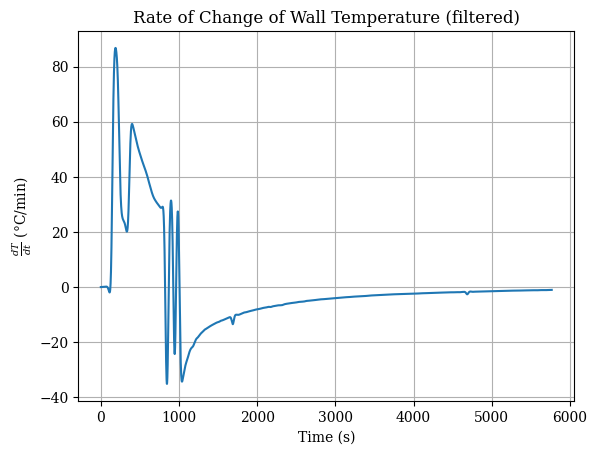

In [54]:
fs = 1 # slow sampling freq (Hz)
fc = 1/60 # cutoff freq (Hz)
Wn = fc / (fs / 2) # normalize freq
N = 2
b, a = signal.butter(N, Wn, 'low')
dTdt_filtered = signal.filtfilt(b, a, data['Rate of Temp Change [C/min]'])

timeobj = np.arange(0, len(data['Time']), 1)
plt.plot(timeobj, dTdt_filtered)
plt.title('Rate of Change of Wall Temperature (filtered)')
plt.xlabel('Time (s)')
plt.ylabel(r'$\frac{dT}{dt}$ (°C/min)')
plt.grid()

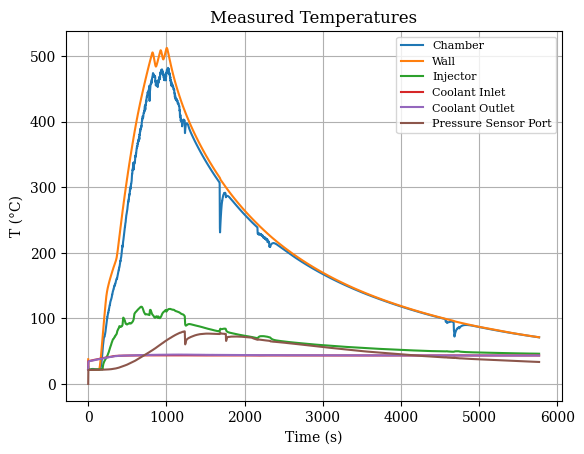

In [55]:
plt.plot(timeobj, data['Internal Temp [C]'], label='Chamber')
plt.plot(timeobj, data['Wall Temp [C]'], label='Wall')
plt.plot(timeobj, data['Injector Temp [C]'], label='Injector')
plt.plot(timeobj, data['Coolant In Temp [C]'], label='Coolant Inlet')
plt.plot(timeobj, data['Coolant Out Temp [C]'], label='Coolant Outlet')
plt.plot(timeobj, data['Pressure Temp [C]'], label='Pressure Sensor Port')
plt.title('Measured Temperatures')
plt.xlabel('Time (s)')
plt.ylabel('T (°C)')
plt.legend(fontsize=8)
plt.grid()

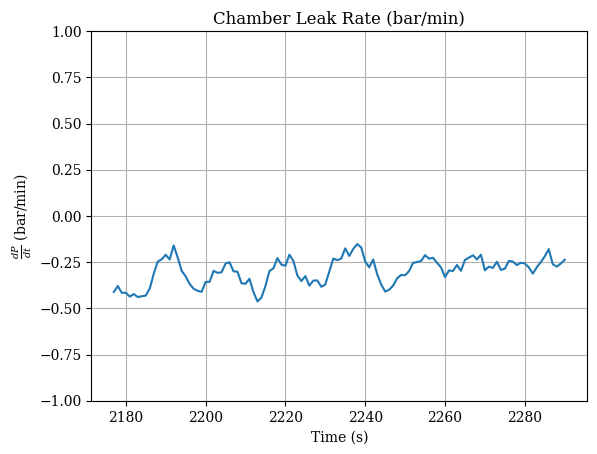

In [56]:
plt.plot(timeobj[2177:2291], data['Leakage Rate [Bar/Min]'][2177:2291])
plt.title('Chamber Leak Rate (bar/min)')
plt.xlabel('Time (s)')
plt.ylabel(r'$\frac{dP}{dt}$ (bar/min)')
plt.ylim(-1, 1)
plt.grid()

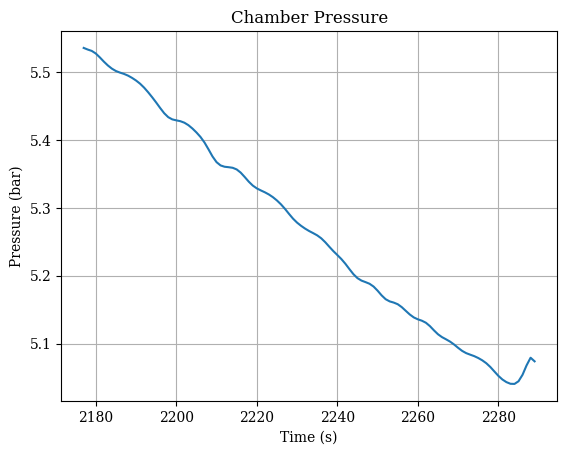

In [57]:
fs = 1 # slow sampling freq (Hz)
fc = 1/10 # cutoff freq (Hz)
Wn = fc / (fs / 2) # normalize freq
N = 2
b, a = signal.butter(N, Wn, 'low')
P_filtered = signal.filtfilt(b, a, data['Chamber Pressure [Bar]'])

plt.plot(timeobj[2177:2290], P_filtered[2177:2290])
plt.title('Chamber Pressure')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (bar)')
plt.grid()